In [1]:
#Gesture RECOGNITION 

In [3]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg # Plotting

In [4]:
from __future__ import print_function
from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [5]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'05_thumb': 0,
 '08_palm_moved': 1,
 '02_l': 2,
 '01_palm': 3,
 '07_ok': 4,
 '10_down': 5,
 '06_index': 6,
 '09_c': 7,
 '03_fist': 8,
 '04_fist_moved': 9}

In [6]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

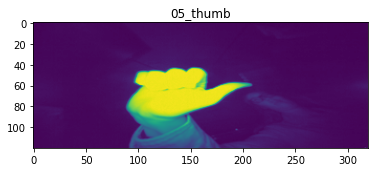

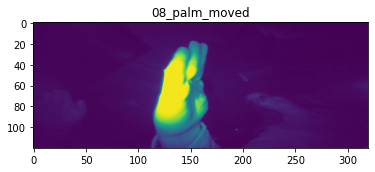

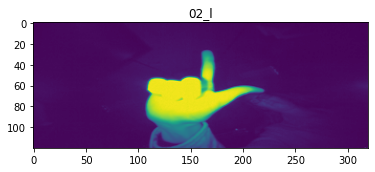

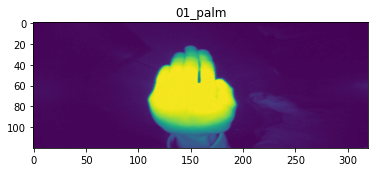

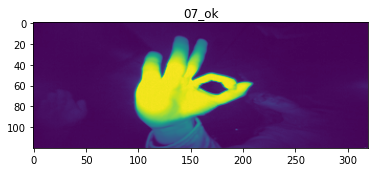

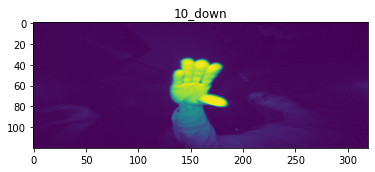

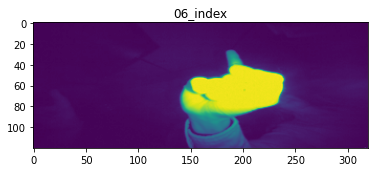

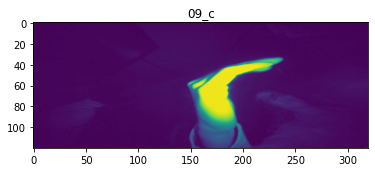

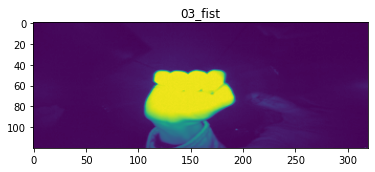

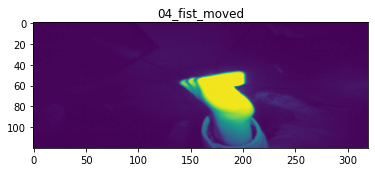

In [7]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [8]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data)
type(y_data)
y_data[1:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255


In [10]:
x_data[1:10]

array([[[[0.01960784],
         [0.02352941],
         [0.01960784],
         ...,
         [0.01960784],
         [0.02352941],
         [0.01960784]],

        [[0.02352941],
         [0.02352941],
         [0.02352941],
         ...,
         [0.01960784],
         [0.01960784],
         [0.01960784]],

        [[0.02352941],
         [0.02352941],
         [0.02352941],
         ...,
         [0.01960784],
         [0.02352941],
         [0.02352941]],

        ...,

        [[0.02352941],
         [0.01960784],
         [0.01960784],
         ...,
         [0.02352941],
         [0.02352941],
         [0.02352941]],

        [[0.02352941],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01568628],
         [0.02352941],
         [0.02352941]],

        [[0.02352941],
         [0.01960784],
         [0.01960784],
         ...,
         [0.10980392],
         [0.03137255],
         [0.03921569]]],


       [[[0.02352941],
         [0.02352941],
         [0.02

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, batch_size=150, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/3
107/107 [==============================] - 86s 781ms/step - loss: 0.4617 - accuracy: 0.8664 - val_loss: 0.0094 - val_accuracy: 0.9985
Epoch 2/3
107/107 [==============================] - 81s 761ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 6.7926e-04 - val_accuracy: 1.0000
Epoch 3/3
107/107 [==============================] - 82s 762ms/step - loss: 0.0232 - accuracy: 0.9971 - val_loss: 0.0065 - val_accuracy: 0.9985


In [15]:
model.evaluate(x_test,y_test,verbose=1)

63/63 [==============================] - 5s 71ms/step - loss: 0.0066 - accuracy: 0.9985


[0.0066168783232569695, 0.9985000491142273]

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())

Test loss: 0.0066168783232569695
Test accuracy: 0.9985000491142273
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
